In [3]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
 
from utils.nolearn_net import NeuralNet
from utils.helper import *
#from utils.iterator import BaseBatchIterator
#from utils.utils import parse_conf_file
#from utils.preprocessing import build_pipeline
import importlib
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [253]:
from utils.helper import *
from utils.train_utils import *

In [135]:
map(int,np.linspace(25,200,num=10))

[25, 44, 63, 83, 102, 122, 141, 161, 180, 200]

In [113]:
m = Model(config,mode ='train')

Loading the prepro pipeline : [u'MyImputer', u'MyStandardScaler']
Loading data iterator using : benchmark
Le train is composed by 21 group and 3738 observation
Le val is composed by 8 group and 1112 observation
Le test is composed by 5 group and 948 observation
Build the architecture: lstm, build_simple_lstm
Set up the checkpoints
Initialize the network 


In [128]:
m.seq_length = 5*12

In [136]:
m.root

u'/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0'

In [129]:
m.nb_epochs =20

In [130]:
m.continue_training = False

In [131]:
m.train()

      3      14.17581      11.41558      1.24179  3.36s
      4      12.46666      10.49290      1.18810  3.30s
      5      11.50960      10.06551      1.14347  3.30s
      6      10.90883       9.75034      1.11881  3.29s
      7      10.42059       9.49202      1.09783  3.29s
      8       9.99423       9.27292      1.07779  3.29s
      9       9.61446       9.08400      1.05839  3.30s
     10       9.27494       8.91656      1.04019  3.35s
     11       8.96900       8.76235      1.02358  3.30s
     12       8.68996       8.61889      1.00825  3.35s
     13       8.43430       8.48817      0.99365  3.30s
     14       8.20186       8.37462      0.97937  3.30s
     15       7.99391       8.28050      0.96539  3.35s
     16       7.80981       8.20432      0.95191  3.34s
     17       7.64653       8.14404      0.93891  3.38s
     18       7.50042       8.09831      0.92617  3.31s
     19       7.36801       8.06625      0.91344  3.31s
     20       7.24634       8.04692      0.90051

# Test 

In [222]:
from utils.result_utils import *

In [265]:
m.root

u'/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0'

In [267]:
results = get_result(m.root,hp=['lr', 'reg', 'seq_length','hiddens','grad_clip'])

In [271]:
results.sort_values('val')

,root,model,lr,reg,seq_length,hiddens,grad_clip,train,val
0,/Users/thorey/Documents/project/competition/fo...,grad_clip_10_hiddens_100_lr_0.001_reg_1e-06_se...,1.000000e-03,1.000000e-06,200,100,10,2.722,2.684
1,/Users/thorey/Documents/project/competition/fo...,grad_clip_1_hiddens_100_lr_0.001_reg_1e-06_seq...,1.000000e-03,1.000000e-06,200,100,1,2.722,2.684
2,/Users/thorey/Documents/project/competition/fo...,grad_clip_20_hiddens_100_lr_0.001_reg_1e-06_se...,1.000000e-03,1.000000e-06,200,100,20,2.722,2.684
3,/Users/thorey/Documents/project/competition/fo...,hiddens_100_lr_0.001_reg_1e-06_seq_length_200,1.000000e-03,1.000000e-06,200,100,1,2.798,2.816
4,/Users/thorey/Documents/project/competition/fo...,hiddens_100_lr_0.001_reg_1e-06_seq_length_100,1.000000e-03,1.000000e-06,100,100,1,3.220,2.877
5,/Users/thorey/Documents/project/competition/fo...,hiddens_100_lr_0.001_reg_1e-06_seq_length_60,1.000000e-03,1.000000e-06,60,100,1,3.444,3.149
6,/Users/thorey/Documents/project/competition/fo...,hiddens_100_lr_0.001_reg_1e-06_seq_length_48,1.000000e-03,1.000000e-06,48,100,1,3.601,3.304
7,/Users/thorey/Documents/project/competition/fo...,hiddens_100_lr_0.001_reg_1e-06_seq_length_36,1.000000e-03,1.000000e-06,36,100,1,3.764,3.415
8,/Users/thorey/Documents/project/competition/fo...,hiddens_100_lr_0.001_reg_1e-06_seq_length_24,1.000000e-03,1.000000e-06,24,100,1,3.906,3.556
9,/Users/thorey/Documents/project/competition/fo...,hiddens_60_lr_0.0001_reg_1e-06,1.000000e-04,1.000000e-06,25,60,1,3.856,3.586


In [239]:
results.model.iloc[0]

u'hiddens_100_lr_0.001_reg_1e-06_seq_length_200'

In [255]:
config = os.path.join(results.root.iloc[0],results.model.iloc[0],'conf_model.json')
config = parse_conf_file(config)
m = Model(config,mode= 'inspection')

Loading the prepro pipeline : [u'MyImputer', u'MyStandardScaler']
Loading data iterator using : benchmark
Le train is composed by 21 group and 3738 observation
Le val is composed by 8 group and 1112 observation
Le test is composed by 5 group and 948 observation
Build the architecture: lstm, build_simple_lstm
Initialize the network 
Loading model params from /Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0/hiddens_100_lr_0.001_reg_1e-06_seq_length_200/model.pkl
Loaded parameters to layer 'lstm' (shape 9x100).
Loaded parameters to layer 'lstm' (shape 100x100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 9x100).
Loaded parameters to layer 'lstm' (shape 100x100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 9x100).
Loaded parameters to layer 'lstm' (shape 100x100).
Loaded parameters to layer 'lstm' (shape 100).
Loaded parameters to layer 'lstm' (shape 9x100).
Loaded parameter

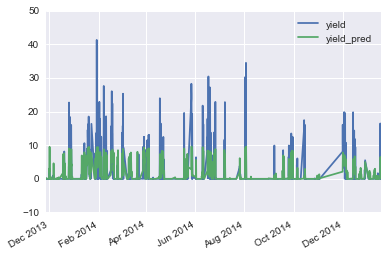

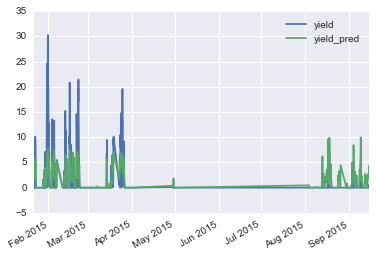

In [263]:
m.predict_yield('train')[['yield','yield_pred']].plot()
m.predict_yield('val')[['yield','yield_pred']].plot()

In [ ]:
df = 

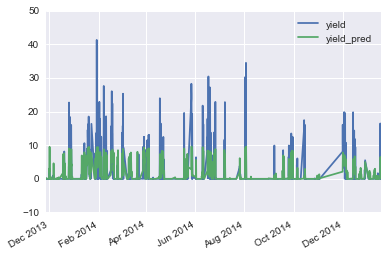

In [272]:
m.predict_yield('train')[['yield','yield_pred']].plot()

In [250]:
m.model_fname

u'/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0/hiddens_100_lr_0.001_reg_1e-06/model.pkl'

In [251]:
config['model_fname']

u'/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0/hiddens_100_lr_0.001_reg_1e-06_seq_length_200/model.pkl'

In [249]:
results.iloc[0]

root          /Users/thorey/Documents/project/competition/fo...
model             hiddens_100_lr_0.001_reg_1e-06_seq_length_200
lr                                                        0.001
reg                                                       1e-06
seq_length                                                  200
hiddens                                                     100
train                                                     2.798
val                                                       2.816
Name: 0, dtype: object

In [247]:
config

{u'batch_size': 25,
 u'build_ite': u'benchmark',
 u'continue_training': False,
 u'feats': [u'percip_mm',
  u'humidity',
  u'temp',
  u'leafwet450_min',
  u'leafwet460_min',
  u'leafwet_lwscnt',
  u'gusts_ms',
  u'wind_dir',
  u'wind_ms'],
 u'folder': u'/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0/hiddens_100_lr_0.001_reg_1e-06_seq_length_200',
 u'grad_clip': 1,
 u'hiddens': 100,
 u'hp': {u'hiddens': 100, u'lr': 0.001, u'reg': 1e-06, u'seq_length': 200},
 u'loss_function': u'squared_error',
 u'lr': 0.001,
 u'mode': u'train',
 u'model': u'lstm',
 u'model_fname': u'/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0/hiddens_100_lr_0.001_reg_1e-06_seq_length_200/model.pkl',
 u'model_graph_fname': u'/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0/hiddens_100_lr_0.001_reg_1e-06_seq_length_200/model_history.png',
 u'model_history_fname': u'/Users/thorey/Documents/project/competition/fognet/models/bbking/l

In [160]:
res = get_result(m.root)

In [172]:
res.name.iloc[0]

u'hiddens_100_lr_0.001_reg_1e-06_seq_length_12'

In [169]:
res.iloc[0].name

0

In [173]:
os.path.join(res.iloc[0].root,res.name.iloc[0],'model_history.png')

u'/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0/hiddens_100_lr_0.001_reg_1e-06_seq_length_12/model_history.png'

In [175]:
import matplotlib.image as mpimg

In [180]:
%matplotlib inline

In [9]:
config = parse_conf_file('/Users/thorey/Documents/project/competition/fognet/models/bbking/lstm/model_0/conf_model.json')

In [12]:
config

{u'architecture': u'build_simple_lstm',
 u'batch_size': 25,
 u'build_ite': u'benchmark',
 u'continue_training': False,
 u'feats': [u'percip_mm',
  u'humidity',
  u'temp',
  u'leafwet450_min',
  u'leafwet460_min',
  u'leafwet_lwscnt',
  u'gusts_ms',
  u'wind_dir',
  u'wind_ms'],
 u'grad_clip': 1,
 u'hiddens': 60,
 u'loss_function': u'squared_error',
 u'lr': 0.0001,
 u'model': u'lstm',
 u'name': u'micro',
 u'nb_epochs': 1000,
 u'overwrite': True,
 u'patience': 25,
 u'pipe_kwargs': {u'MyImputer__strategy': u'mean'},
 u'pipe_list': [u'MyImputer', u'MyStandardScaler'],
 u'platform': u'ray',
 u'reg': 1e-06,
 u'root': u'/Users/cthorey/Documents/project/competition/fognet/models/ray/lstm/model_0',
 u'seq_length': 25,
 u'stride': 1,
 u'update_rule': u'adam',
 u'verbose': 11}

In [ ]:
a = {'b':2,'a':1}
class D(object):
    def __init__(self,a):
        map(set)
        

In [381]:
pipeline = build_pipeline(config['pipe_list'], config['pipe_kwargs'])
nb_features, batch_ite_train, batch_ite_val, batch_ite_test, batch_ite_pred = load_data(
        name=config['name'],
        feats=config['feats'],
        build_ite=config['build_ite'],
        pipeline=pipeline)
model = importlib.import_module(
        'model_defs.%s' % config['model'])
builder = getattr(model, config['architecture'])
architecture = builder(D=nb_features, H=config[
        'hiddens'], grad_clip=config['grad_clip'])

Le train is composed by 21 group and 3738 observation
Le val is composed by 8 group and 1112 observation
Le test is composed by 5 group and 948 observation


In [385]:
net = NeuralNet(
        layers=architecture,
        regression=True,
        objective_loss_function=getattr(
            lasagne.objectives, config['loss_function']),
        objective_l2=config['reg'],  # L2 regularization
        update=getattr(lasagne.updates, config['update_rule']),
        update_learning_rate=config['lr'],
        batch_iterator_train=batch_ite_train,
        batch_iterator_test=batch_ite_val,
        verbose=config['verbose'],
        max_epochs=10000,)
net.initialize()
net.load_params_from(config['model_fname'])
with open(config['model_history_fname']) as f:
    net.train_history_ = pickle.load(f)

Loaded parameters to layer 'lstm' (shape 9x25).
Loaded parameters to layer 'lstm' (shape 25x25).
Loaded parameters to layer 'lstm' (shape 25).
Loaded parameters to layer 'lstm' (shape 9x25).
Loaded parameters to layer 'lstm' (shape 25x25).
Loaded parameters to layer 'lstm' (shape 25).
Loaded parameters to layer 'lstm' (shape 9x25).
Loaded parameters to layer 'lstm' (shape 25x25).
Loaded parameters to layer 'lstm' (shape 25).
Loaded parameters to layer 'lstm' (shape 9x25).
Loaded parameters to layer 'lstm' (shape 25x25).
Loaded parameters to layer 'lstm' (shape 25).
Loaded parameters to layer 'lstm' (shape 25).
Loaded parameters to layer 'lstm' (shape 25).
Loaded parameters to layer 'lstm' (shape 25).
Loaded parameters to layer 'lstm' (shape 1x25).
Loaded parameters to layer 'lstm' (shape 1x25).
Loaded parameters to layer 'dense' (shape 25x1).
Loaded parameters to layer 'dense' (shape 1).


In [388]:
net.get_score_whole_set('train'),net.get_score_whole_set('test')

(3.0808924682517103, 5.8183123682635864)

In [389]:
from utils.hook import write_final_score

In [390]:
write_final_score(config,net)

In [395]:
from utils.prediction_utils import *

In [397]:
    final_pred = prediction(net, batch_ite_pred)
    make_submission(config, final_pred)

Will write output to /Users/thorey/Documents/project/competition/fognet/models/lstm/model_3/h_25_rg_1e-07_lr_0.001/submissions_20160322_144424.csv


In [440]:
def conf_generator(config, parameters_grids):

    assert all([f in ['lr', 'reg', 'hiddens'] for f in parameters_grid.keys()])
    product = [x for x in apply(itertools.product, parameters_grid.values())]
    conf_runs = [dict(zip(parameters_grid.keys(), p)) for p in product]
    for conf_run in conf_runs:
        config.update(conf_run)
        yield config

In [441]:
parameters_grid = {'lr':np.arange(1,10,1),
                  'reg':np.arange(1,10,1),
                  'hiddens':np.arange(1,10,1)}

In [435]:
    parameters_grid = {'lr': np.logspace(-7, -1, num=20),
                       'reg': np.logspace(-7, -1, num=20),
                       'hiddens': range(25, 525, 25)}
    confs = conf_generator(config, parameters_grid)

In [437]:
import multiprocessing

In [438]:
multiprocessing.cpu_count()

4

In [434]:
for i,elt in enumerate(confs):
    print(elt['lr'])
    if i>10:
        sys.exit()

2
2
2
2
2
2
3
3
3
3
3
3


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [439]:

from multiprocessing import Pool 

In [449]:
parameters_grid

{'hiddens': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'lr': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'reg': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [453]:
def test(config):
    print(config['lr'],config['reg'],config['hiddens'])

In [ ]:
def conf_generator(config, parameters_grids):

    assert all([f in ['lr', 'reg', 'hiddens'] for f in parameters_grid.keys()])
    product = [x for x in apply(itertools.product, parameters_grid.values())]
    conf_runs = [dict(zip(parameters_grid.keys(), p)) for p in product]
    for conf_run in conf_runs:
        config.update(conf_run)
        yield config

In [459]:
for elt in confs:
    print(elt)

9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 

In [457]:
confs = conf_generator(config,parameters_grid)

In [458]:
pool = Pool()
pool.map(test, confs)
pool.close() 
pool.join()

9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 9
9 9 

In [476]:
    parameters_grid = {'lr': np.logspace(-3, -2, num=2),
                       'reg': [1e-7],
                       'hiddens': [25, 1,50]}

In [523]:
class MyDict(dict):

    def update(self, *args):
        dict.update(self, *args)
        return self

In [546]:
def conf_generator(config, parameters_grids):

    assert all([f in ['lr', 'reg', 'hiddens'] for f in parameters_grid.keys()])
    product = [x for x in apply(itertools.product, parameters_grid.values())]
    conf_runs = [dict(zip(parameters_grid.keys(), p)) for p in product]
    confs = map(lambda d: update_dict(config, d), conf_runs)
    return confs


In [548]:
confs = conf_generator(config,parameters_grid)

In [549]:
for elt in confs:
    print(elt['lr'],elt['hiddens'],elt['reg'])

0.001 25 1e-07
0.01 25 1e-07
0.001 1 1e-07
0.01 1 1e-07
0.001 50 1e-07
0.01 50 1e-07


In [515]:
def worker(elt):
    print(elt['lr'],elt['hiddens'],elt['reg'])

In [550]:
confs = conf_generator(config,parameters_grid)
pool = Pool()
pool.map(worker, ite)
pool.close()
pool.join()

0.001 25 1e-07
0.01 25 1e-07
0.001 1 1e-07
0.01 1 1e-07
0.001 50 1e-07
0.01 50 1e-07


In [494]:
class myDict(dict):
    def update(self, *args):
    	dict.update(self, *args)
    	return self

In [496]:
myconfig = myDict(config)

In [498]:
map(myconfig.update,ite)

[{u'architecture': u'build_simple_lstm',
  u'build_ite': u'benchmark',
  u'conf': u'../models/lstm/model_3/conf_model.json',
  u'continue_training': False,
  u'feats': [u'percip_mm',
   u'humidity',
   u'temp',
   u'leafwet450_min',
   u'leafwet460_min',
   u'leafwet_lwscnt',
   u'gusts_ms',
   u'wind_dir',
   u'wind_ms'],
  u'folder': u'/Users/thorey/Documents/project/competition/fognet/models/lstm/model_3/h_25_rg_1e-07_lr_0.001',
  u'grad_clip': 50,
  u'hiddens': 50,
  u'loss_function': u'squared_error',
  u'lr': 0.01,
  u'model': u'lstm',
  u'model_fname': u'/Users/thorey/Documents/project/competition/fognet/models/lstm/model_3/h_25_rg_1e-07_lr_0.001/model.pkl',
  u'model_graph_fname': u'/Users/thorey/Documents/project/competition/fognet/models/lstm/model_3/h_25_rg_1e-07_lr_0.001/model_history.png',
  u'model_history_fname': u'/Users/thorey/Documents/project/competition/fognet/models/lstm/model_3/h_25_rg_1e-07_lr_0.001/model_history.pkl',
  u'model_name': u'h_25_rg_1e-07_lr_0.001',


In [492]:
def update_dict(config,d):
    config.update(d)
    return config


In [493]:
map(update_dict,ite)

TypeError: update_dict() takes exactly 2 arguments (1 given)

In [501]:
class myDict(dict):

    def update(self, *args):
        dict.update(self, *args)
        return self


def conf_generator(config, parameters_grids):

    config = myDict(config)
    assert all([f in ['lr', 'reg', 'hiddens'] for f in parameters_grid.keys()])
    product = [x for x in apply(itertools.product, parameters_grid.values())]
    conf_runs = [dict(zip(parameters_grid.keys(), p)) for p in product]
    conf_runs = map(dict, map(config.update, conf_runs))
    return conf_runs

In [503]:
confs = conf_generator(config,parameters_grid)

In [504]:
len(confs)

6

In [505]:
pool = Pool()
pool.map(worker, confs)
pool.close()
pool.join()

0.01 50 1e-07
0.01 50 1e-07
0.01 50 1e-07
0.01 50 1e-07
0.01 50 1e-07
0.01 50 1e-07


In [552]:
multiprocessing.cpu_count()

4